In [1]:
import numpy as np
from itertools import chain

from display import *
from grid import *
from path_finder import *

In [2]:
def rosemarkie1():

    o = np.array([1,1,1,1])

    yield [simple_wall((0,0), (1,0), 30) + o + np.array([0,7,0,7])]
    yield [simple_wall((0,0), (1,0), 30) + o + np.array([0,8 + 12,0,8 + 12])]

    for x in range(3):
        for y in range(3):

            c = np.array([10 * x, 8 * y,
                          10 * x, 8 * y])

            neg = np.array(list(wall_continuous((0, 0),
                [
                    [(1,1), 7],
                    [(-1,1), 3],
                    [(-1,-1), 2],
                    [(1,0), 4]
                ]))) + c

            pos = np.array(list(wall_continuous((0,0),
                [
                    [(1,-1), 7],
                    [(-1,-1), 3],
                    [(-1,1), 2],
                    [(1,0), 4]
                ]))) + c + np.array([5,11,5,11])

            if y > 0:
                yield neg + o
            
            if y < 2:
                yield pos + o

            if y == 0:
                tick = pos[0][:2]
                tick += np.array([-1, -1])

                yield np.array(list(wall_continuous(tick,
                [
                    [(1,1), 4],
                    [(1,-1), 2],
                    [(-1,0), 4]
                ]))) + o

            if y == 2:
                tick = neg[0][:2]
                tick += np.array([-1, 1])
                yield np.array(list(wall_continuous(tick,
                [
                    [(1,-1), 4],
                    [(1,1), 2],
                    [(-1,0), 4]
                ]))) + o




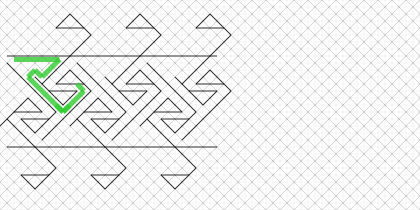

In [3]:
cols = 30
rows = 15
size = 14
display = Display(cols * size, rows * size)

test_pat = np.array(list(chain(*rosemarkie1()))) * size * 0.5

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    width = 5
    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([1,7]) * size, (1,0), test_pat, size)
    for i in range(12):
        pass
        #draw_simple_lines(context, list(pf.step()))

    context.set_source_rgba(0.2, 0.8, 0.2, 0.8)
    pf = PathFind(np.array([1,4.25]) * size, (1,0), test_pat, size)
    for i in range(6):
        draw_simple_lines(context, list(pf.step()))
    
display.show()